In [2]:
import sys
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from nolearn.dbn import DBN

import sys
import os
import numpy as np
import theano
import theano.tensor as T
import lasagne

from PIL import Image
import glob
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

ImportError: cannot import name 'downsample'

In [2]:
#First step, read in the batch files and extract the key parameters from the files
from os import listdir
from os.path import isfile, join
import fnmatch
mypath = '/Volumes/Workspace/output2/images'
imagePath = [f for f in glob(mypath + '/*.jpg')]
print(len(imagePath))

51200


In [3]:
X = np.array( [(np.array(Image.open(imagePath[i]).convert('L'), 'f')/255).flatten() for i in range(len(imagePath))] )
X = X.reshape((-1, 1, 256, 256))
X.shape
    

(51200, 1, 256, 256)

In [4]:
Y = np.array( [int(file.split('_')[2]) for file in imagePath])
Y = Y.astype(np.int32)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=0)


In [5]:
categories = len(np.unique(Y))
print(categories)

10


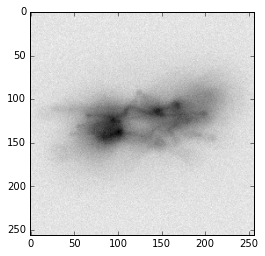

In [6]:
plt.imshow(X_train[0][0], cmap=cm.binary)

In [7]:
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 256, 256),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=categories,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=30,
    verbose=1,
    )

# Train the network
nn = net1.fit(X_train, Y_train)

# Neural Network with 30511722 learnable parameters

## Layer information

  #  name      size
---  --------  ----------
  0  input     1x256x256
  1  conv2d1   32x252x252
  2  maxpool1  32x126x126
  3  conv2d2   32x122x122
  4  maxpool2  32x61x61
  5  dropout1  32x61x61
  6  dense     256
  7  dropout2  256
  8  output    10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  --------
      1     2.02028     1.83736    1.09956      0.27355  6962.61s
      2     1.86188     1.77577    1.04849      0.29478  6926.98s
      3     1.80387     1.71235    1.05345      0.31979  6950.83s
      4     1.71477     1.60007    1.07168      0.36262  6915.62s
      5     1.61558     1.51893    1.06363      0.39653  6914.40s
      6     1.56413     1.47737    1.05872      0.41557  6933.43s
      7     1.50611     1.44047    1.04557      0.43326  6910.37s
      8     1.49543     1.48133    1.00952      0.41496  6930.96s
      9     1.46

In [8]:
preds = net1.predict(X_test)

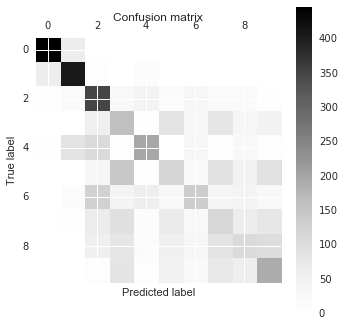

In [9]:
import seaborn as sns
cm = confusion_matrix(Y_test, preds)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
        

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

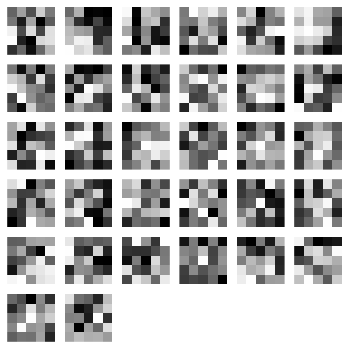

In [10]:
visualize.plot_conv_weights(net1.layers_['conv2d1'])

In [22]:
X_train_flatten = X_train.reshape((X_train.shape[0],X_train.shape[3]**2))
net2 = DBN([X_train_flatten.shape[1], 800, 800, 10], 
           learn_rates = 0.3,
           learn_rate_decays = 0.9,
           epochs = 10,
           verbose = 1)

nn2 = net2.fit(X_train_flatten, Y_train)

[DBN] fitting X.shape=(20480, 65536)
[DBN] layers [65536, 800, 800, 10]
[DBN] Fine-tune...


100%


Epoch 1:
  loss 1.38198562487e+18
  err  0.901025390625
  (0:13:25)


100%


Epoch 2:
  loss 2.31105389595
  err  0.9009765625
  (0:13:27)


100%


Epoch 3:
  loss 2.3091796279
  err  0.894091796875
  (0:13:29)


100%


Epoch 4:
  loss 2.30963303894
  err  0.898291015625
  (0:13:28)


100%


Epoch 5:
  loss 2.30928203687
  err  0.901318359375
  (0:13:30)


100%


Epoch 6:
  loss 2.30764311776
  err  0.897509765625
  (0:13:33)


100%


Epoch 7:
  loss 2.3075539276
  err  0.897802734375
  (0:13:31)


100%


Epoch 8:
  loss 2.30740450844
  err  0.89833984375
  (0:13:32)


100%


Epoch 9:
  loss 2.30702736527
  err  0.90068359375
  (0:13:33)


100%


Epoch 10:
  loss 2.30671024099
  err  0.9044921875
  (0:13:26)
